In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.interpolate import UnivariateSpline
data=pd.read_pickle('AQI-FE1-Binarized.pkl')
dx=data[[ 'Month', 'Quarter', 'Dayofweek', 'HourofDay',
       'DayofMonth', 'Dayoftheyear', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday','T']].copy(deep=True)
dx.sort_index(inplace=True)

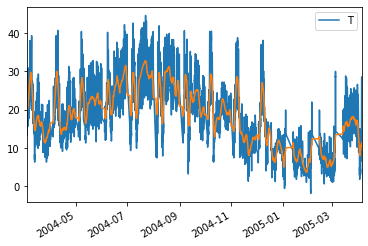

In [2]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx1=dx['T'].rolling(window=72, center=True, min_periods=24).mean()
dx.plot(y='T',ax=ax)
dx1.plot(y='T', ax=ax)

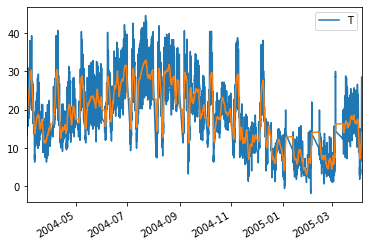

In [3]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx2=dx['T'].rolling(window=48, center=True, min_periods=24).mean()
dx.plot(y='T',ax=ax)
dx2.plot(y='T', ax=ax)

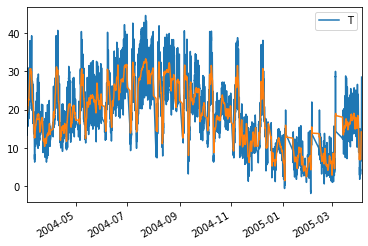

In [4]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx3=dx['T'].rolling(window=24, center=True, min_periods=24).mean()
dx.plot(y='T',ax=ax)
dx3.plot(y='T', ax=ax)

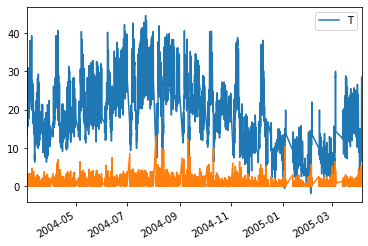

In [5]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx4=dx['T'].rolling(window=2, center=True, min_periods=1).std()
dx.plot(y='T',ax=ax)
dx4.plot(y='T', ax=ax)

In [6]:
dx['rolling-72']=dx['T'].loc[:'2005-3-1'].rolling(window=24, center=True, min_periods=1).mean()
dx['rolling-72-min']=dx['T'].loc[:'2005-3-1'].rolling(window=24, center=True, min_periods=1).min()
dx['rolling-72-max']=dx['T'].loc[:'2005-3-1'].rolling(window=24, center=True, min_periods=1).max()
dx['rolling-72-std']=dx['T'].loc[:'2005-3-1'].rolling(window=24, center=True, min_periods=1).std()
dx['rolling-48']=dx['T'].loc[:'2005-3-1'].rolling(window=12, center=True, min_periods=1).mean()
dx['rolling-48-min']=dx['T'].loc[:'2005-3-1'].rolling(window=12, center=True, min_periods=1).min()
dx['rolling-48-max']=dx['T'].loc[:'2005-3-1'].rolling(window=12, center=True, min_periods=1).max()
dx['rolling-48-std']=dx['T'].loc[:'2005-3-1'].rolling(window=12, center=True, min_periods=1).std()
dx['rolling-24']=dx['T'].loc[:'2005-3-1'].rolling(window=8, center=True, min_periods=1).mean()
dx['rolling-24-min']=dx['T'].loc[:'2005-3-1'].rolling(window=8, center=True, min_periods=1).min()
dx['rolling-24-max']=dx['T'].loc[:'2005-3-1'].rolling(window=8, center=True, min_periods=1).max()
dx['rolling-24-std']=dx['T'].loc[:'2005-3-1'].rolling(window=8, center=True, min_periods=1).std()
dx['rolling-12']=dx['T'].loc[:'2005-3-1'].rolling(window=4, center=True, min_periods=1).mean()
dx['rolling-12-min']=dx['T'].loc[:'2005-3-1'].rolling(window=4, center=True, min_periods=1).min()
dx['rolling-12-max']=dx['T'].loc[:'2005-3-1'].rolling(window=4, center=True, min_periods=1).max()
dx['rolling-12-std']=dx['T'].loc[:'2005-3-1'].rolling(window=4, center=True, min_periods=1).std()

In [7]:
train=dx.loc[:'2005-3-1'].copy(deep=True)
test=dx.loc['2005-3-2':].copy(deep=True)

In [8]:
#attb=['rolling-72','rolling-48','rolling-24','rolling-12']
attb=['Month','Dayofweek','HourofDay','DayofMonth',
      #'Dayoftheyear',
      #'rolling-72',
      'rolling-72-min','rolling-72-max','rolling-72-std',
         #'rolling-48',
      'rolling-48-min','rolling-48-max','rolling-48-std',
         'rolling-24',
      'rolling-24-min','rolling-24-max','rolling-24-std',
         'rolling-12','rolling-12-min','rolling-12-max','rolling-12-std']
RM = lm.LinearRegression()
RM.fit(train[attb].loc['2005-2-20':],train['T'].loc['2005-2-20':])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
window=train['T'].loc["2005-2-27":].values.tolist()
window[-12:]
dta_lst=[]
ctr=0
for x in test.index:
    lst=[test['Month'].loc[x],test['Dayofweek'].loc[x],test['HourofDay'].loc[x],
         test['DayofMonth'].loc[x],
         #test['Dayoftheyear'].loc[x],
         #np.mean(window[-72:]),
         np.min(window[-24:]),np.max(window[-24:]),np.std(window[-24:]),
         #np.mean(window[-48:]),
         np.min(window[-12:]),
         np.max(window[-12:]),np.std(window[-12:]),
         np.mean(window[-8:]),
         np.min(window[-8:]),
         np.max(window[-8:]),np.std(window[-8:]),
         np.mean(window[-4:]),np.min(window[-4:]),np.max(window[-4:]),np.std(window[-4:])]
    
    pred=RM.predict(np.asarray([lst]).reshape(1,-18))
    window.append(pred[0])
    lst.append(pred[0])
    dta_lst.append(lst)

#train['T'].loc["2005-2-27":]

In [10]:
'''collist=['Month','Dayofweek','HourofDay',
         'rolling-72','rolling-72-min','rolling-72-max','rolling-72-std',
         'rolling-48','rolling-48-min','rolling-48-max','rolling-48-std',
         'rolling-24','rolling-24-min','rolling-24-max','rolling-24-std',
         'rolling-12','rolling-12-min','rolling-12-max','rolling-12-std',
         'Prediction']'''
collist=['Month','Dayofweek','HourofDay','DayofMonth', 
         #'Dayoftheyear',
         'rolling-72-min','rolling-72-max','rolling-72-std',
         'rolling-48-min','rolling-48-max','rolling-48-std',
         'rolling-24','rolling-24-min','rolling-24-max','rolling-24-std',
         'rolling-12','rolling-12-min','rolling-12-max','rolling-12-std',
         'Prediction']
prediction=pd.DataFrame(dta_lst,columns=collist,dtype='float')
prediction.index=test.index

In [11]:
#test['rolling-72']=prediction['rolling-72'].copy(deep=True)
test['rolling-72-min']=prediction['rolling-72-min'].copy(deep=True)
test['rolling-72-max']=prediction['rolling-72-max'].copy(deep=True)
test['rolling-72-std']=prediction['rolling-72-std'].copy(deep=True)
#test['rolling-48']=prediction['rolling-48'].copy(deep=True)
test['rolling-48-min']=prediction['rolling-48-min'].copy(deep=True)
test['rolling-48-max']=prediction['rolling-48-max'].copy(deep=True)
test['rolling-48-std']=prediction['rolling-48-std'].copy(deep=True)
#test['rolling-24']=prediction['rolling-24'].copy(deep=True)
test['rolling-24-min']=prediction['rolling-24-min'].copy(deep=True)
test['rolling-24-max']=prediction['rolling-24-max'].copy(deep=True)
test['rolling-24-std']=prediction['rolling-24-std'].copy(deep=True)
test['rolling-12']=prediction['rolling-12'].copy(deep=True)
test['rolling-12-min']=prediction['rolling-12-min'].copy(deep=True)
test['rolling-12-max']=prediction['rolling-12-max'].copy(deep=True)
test['rolling-12-std']=prediction['rolling-12-std'].copy(deep=True)
test['Prediction']=prediction['Prediction'].copy(deep=True)

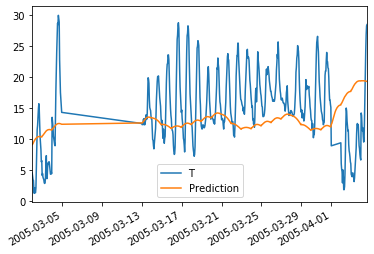

In [12]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
test.plot(y='T',ax=ax)
test.plot(y='Prediction',ax=ax)


In [13]:
pred = RM.predict(test[attb])
pred=pd.DataFrame(pred,columns=['Prediction'])
pred.index=test.index
test1=pd.concat([test,pred],axis=1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx.plot(y='T',ax=ax)
test1.plot(y='Prediction',ax=ax)
dx.plot(y='T')

In [ ]:
mean_squared_error(test1['T'], test1['Prediction'])

In [ ]:
r2_score(test1['T'], test1['Prediction'])

In [ ]:
reg2 = RandomForestRegressor(random_state=1, n_estimators=100,max_depth=30,min_samples_leaf=3,min_samples_split=5)
reg2.fit(train[attb],train['T'])
pred = reg2.predict(test[attb])
pred=pd.DataFrame(pred,columns=['Prediction'])
pred.index=test.index
test1=pd.concat([test,pred],axis=1)
fig, ax = plt.subplots()
#finding trend using rolling window operation
dx.plot(y='T',ax=ax)
test1.plot(y='Prediction',ax=ax)
dx.plot(y='T')

In [ ]:
mean_squared_error(test1['T'], test1['Prediction'])


In [ ]:
r2_score(test1['T'], test1['Prediction'])